<a href="https://colab.research.google.com/github/Tangelus/Fashion-image-classifer/blob/main/Fashion_MNIST_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras

Let's load in the data.<br>
When loading MNIST or Fashion MNIST using Keras rather than Sklearn, one important difference that every image is represented as a 28x28 array rather than a 1D array of size 784. Moreover, the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0).

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

There is no validation set, so let's create one now. <br>
Additionally, since we are going to train the neural network using gradient descent, we must scale the input features. We'll do this by scaling down pixel intensity between 0 - 1 by dividing them by 255.0.

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 250.0

Let's create some class names.

In [7]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

Let's create our model using the Sequential API

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # this converts input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu")),
model.add(keras.layers.Dense(100, activation="relu")),
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


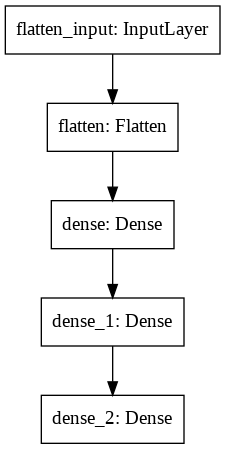

In [9]:
keras.utils.plot_model(model)

Let's compile and train the model. We'll use sparse_categorical_crossentropy because we have sparse labels and the classes are exclusive. 

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Let's plot the validation curves: the mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

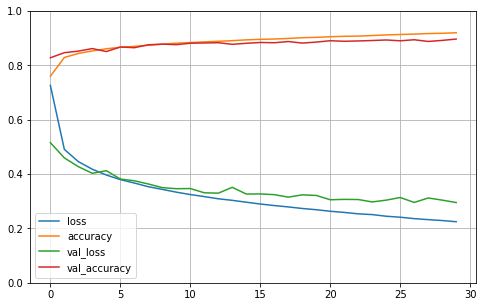

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set vertical range to [0-1]
plt.show()

Let's evaluate the model.

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8864


[0.3270549476146698, 0.8863999843597412]

Now let's make some predictions

In [16]:
X_new = X_test[:3]

In [17]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.95, 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

For each instance the model estimates one probability per class, from class 0 to class 9. For example, for the first image it estimates that the probability of class 9 (ankle boot) is 96% and the probability of class 7 (sneaker) is 0.1%.

In [22]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])